
Usamos para esta solución el mismo código que vemos en la actividad 1

In [ ]:
#!pip install simpleai flask pydot graphviz

In [3]:
#!/usr/bin/env python
# coding: utf-8

# 2024 Modified by: Alejandro Cervantes
# Remember installing pyplot and flask if you want to use WebViewer

# NOTA: WebViewer sólo funcionará si ejecutáis en modo local

from __future__ import print_function

import math, json
from simpleai.search.viewers import BaseViewer,ConsoleViewer,WebViewer
from simpleai.search import SearchProblem, astar, breadth_first, depth_first, uniform_cost

'''
Esta clase espera un grafo expresado en JSON de la siguiente forma

{
  "origen1": { "destino1": coste1 , "destino2": coste2 , ... },
  "origen2": ...,
  ...
}

'''
class StaticGraphSearch(SearchProblem):

    def __init__(self, graph, initial, goals, heuristic_number=1, reverse_order=False):
        self.graph = json.loads(graph) # Transforms to python object
        self.goals = goals
        self.initial = initial
        self.heuristic_number = heuristic_number
        self.reverse_order = reverse_order
        self.node_graph = self.node_graph()

        super(StaticGraphSearch, self).__init__(initial_state=self.initial)

    def graph_successors(self,node):
        list_of_successors = list(k for k in self.graph[node].keys())
        if self.reverse_order:
          list_of_successors.reverse()
        return list_of_successors
#        return [k for k in self.graph[node].keys()]

    def node_graph(self):
        return { k:self.graph_successors(k) for k in self.graph.keys() }

    '''
    Guardaremos como acción la tupla (origen, destino)
    '''
    def actions(self, state):
        actions = []
        for destiny in list(self.node_graph[state]):
          actions.append((state,destiny))
        return actions

    def result(self, state, action):
      if state == action[0]:
        return action[1]
      else:
        raise Exception("result: Invalid pair state, action: state: {} action: {}".format(state,action))

    def is_goal(self, state):
        return state in self.goals

    '''
    Asumimos que la acción tiene formato: (origen,destino)
    '''
    def cost(self, state, action, state2):
      if state == action[0] and state2 == action[1]:
        return self.graph[state][action[1]]
      else:
        raise Exception("cost: Invalid state, action, state2: state: {} action: {} state2: {}".format(state,action,state2))

    # Esta función heurística es la distancia entre el estado actual
    # un objetivo identificado como self.goals
    # Se pueden programar varias y seleccionarlas al crear el objeto
    def heuristic(self,state):
      if self.heuristic_number == 1:
        return 0
      else:
        return 0






Las siguientes funciones sirven para obtener la solución y las estadísticas de la búsqueda, y mostrarlas en la salida.

In [4]:
def searchInfo (problem,result,use_viewer):
    def getTotalCost (problem,result):
        originState = problem.initial_state
        totalCost = 0
        for action,endingState in result.path():
            if action is not None:
                totalCost += problem.cost(originState,action,endingState)
                originState = endingState
        return totalCost


    res = "Total length of solution in nodes: {0}\n".format(len(result.path()))
    res += "Total length of solution in actions: {0}\n".format(len(result.path())-1)
    res += "Total cost of solution: {0}\n".format(getTotalCost(problem,result))

    if use_viewer:
        stats = [{'name': stat.replace('_', ' '), 'value': value}
                         for stat, value in list(use_viewer.stats.items())]

        for s in stats:
            res+= '{0}: {1}\n'.format(s['name'],s['value'])
    return res

In [5]:
def resultado_experimento(problem,result,used_viewer):
    path = [x[1] for x in result.path()] # x[0] contiene la acción, x[1] contiene el destino
    print ('La solución encontrada es: ', path)
    print ('Información sobre la búsqueda: ')
    info=searchInfo(problem,result,used_viewer)
    print(info)

El programa main crea el objeto problema y ejecuta la lista de algoritmos pasada como parámetro.

In [6]:
def main(problem_graph,initial,goals,algorithms,heuristic_number=1,reverse_order=False):
    for algorithm in algorithms:
      problem = StaticGraphSearch(problem_graph,initial,goals,heuristic_number,reverse_order)
      used_viewer=BaseViewer()
      # Probad también ConsoleViewer para depurar
      # No podréis usar WebViewer en Collab para ver los árboles

      # Mostramos los experimentos
      print ("Experimento con algoritmo {}:".format(algorithm))

      result = algorithm(problem, graph_search=True,viewer=used_viewer)

      resultado_experimento(problem,result,used_viewer)


Ejemplo sencillo de ejecución

In [7]:
problem_and_costs_graph='''{
  "a": { "b": 1 , "c": 1 , "d": 4 },
  "b": { "d": 1 },
  "c": { "d": 1 },
  "d": { }
}'''

algorithms=(breadth_first,depth_first,uniform_cost)
initial='a'
goals='d'
main (problem_and_costs_graph,initial,goals,algorithms)

Experimento con algoritmo <function breadth_first at 0x0000020A330A7640>:
La solución encontrada es:  ['a', 'd']
Información sobre la búsqueda: 
Total length of solution in nodes: 2
Total length of solution in actions: 1
Total cost of solution: 4
max fringe size: 3
visited nodes: 4
iterations: 4

Experimento con algoritmo <function depth_first at 0x0000020A331A9D80>:
La solución encontrada es:  ['a', 'd']
Información sobre la búsqueda: 
Total length of solution in nodes: 2
Total length of solution in actions: 1
Total cost of solution: 4
max fringe size: 3
visited nodes: 2
iterations: 2

Experimento con algoritmo <function uniform_cost at 0x0000020A331A9F30>:
La solución encontrada es:  ['a', 'b', 'd']
Información sobre la búsqueda: 
Total length of solution in nodes: 3
Total length of solution in actions: 2
Total cost of solution: 2
max fringe size: 3
visited nodes: 4
iterations: 4



Ejemplo de la clase. Como no cambiamos el orden de generación de nodos, si ejecutamos "profundidad" la solución no coincide con la que mostramos en la clase.

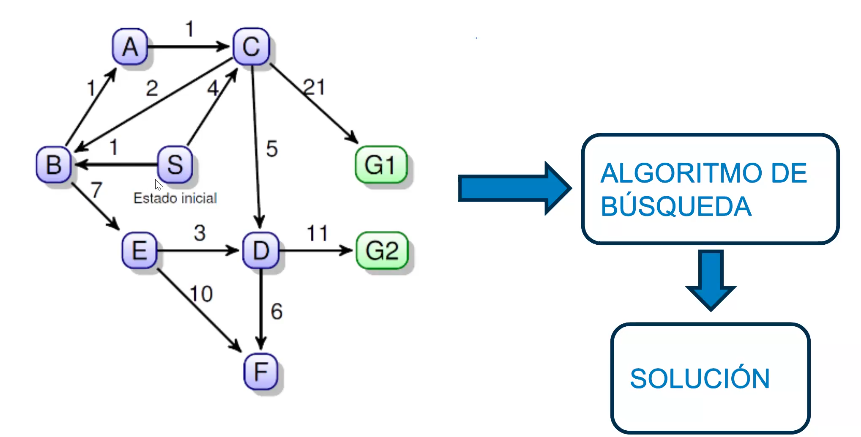

In [8]:
problem_and_costs_graph='''{
  "s": { "b": 1 , "c": 4 },
  "a": { "c": 1 },
  "b": { "a": 1 , "e" : 7 },
  "c": { "b": 2 , "d": 5, "g1": 21 },
  "d": { "f": 6, "g2": 11 },
  "e": { "d": 3, "f": 10 },
  "f": { },
  "g1": { },
  "g2": { }
  }'''

algorithms=(breadth_first,depth_first,uniform_cost)
initial='s'
goals=('g1','g2')
main (problem_and_costs_graph,initial,goals,algorithms)

Experimento con algoritmo <function breadth_first at 0x0000020A330A7640>:
La solución encontrada es:  ['s', 'c', 'g1']
Información sobre la búsqueda: 
Total length of solution in nodes: 3
Total length of solution in actions: 2
Total cost of solution: 25
max fringe size: 4
visited nodes: 7
iterations: 7

Experimento con algoritmo <function depth_first at 0x0000020A331A9D80>:
La solución encontrada es:  ['s', 'c', 'g1']
Información sobre la búsqueda: 
Total length of solution in nodes: 3
Total length of solution in actions: 2
Total cost of solution: 25
max fringe size: 3
visited nodes: 3
iterations: 3

Experimento con algoritmo <function uniform_cost at 0x0000020A331A9F30>:
La solución encontrada es:  ['s', 'b', 'a', 'c', 'd', 'g2']
Información sobre la búsqueda: 
Total length of solution in nodes: 6
Total length of solution in actions: 5
Total cost of solution: 19
max fringe size: 3
visited nodes: 8
iterations: 8



In [9]:
main (problem_and_costs_graph,initial,goals,algorithms,reverse_order=True)

Experimento con algoritmo <function breadth_first at 0x0000020A330A7640>:
La solución encontrada es:  ['s', 'c', 'g1']
Información sobre la búsqueda: 
Total length of solution in nodes: 3
Total length of solution in actions: 2
Total cost of solution: 25
max fringe size: 4
visited nodes: 4
iterations: 4

Experimento con algoritmo <function depth_first at 0x0000020A331A9D80>:
La solución encontrada es:  ['s', 'b', 'e', 'd', 'g2']
Información sobre la búsqueda: 
Total length of solution in nodes: 5
Total length of solution in actions: 4
Total cost of solution: 22
max fringe size: 3
visited nodes: 6
iterations: 6

Experimento con algoritmo <function uniform_cost at 0x0000020A331A9F30>:
La solución encontrada es:  ['s', 'b', 'a', 'c', 'd', 'g2']
Información sobre la búsqueda: 
Total length of solution in nodes: 6
Total length of solution in actions: 5
Total cost of solution: 19
max fringe size: 3
visited nodes: 8
iterations: 8

